 # COMPREHENSIVE EXPLORATORY DATA ANALYSIS (EDA)

# VERIFY TARGET INTEGRITY 

In [42]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

# Load cleaned data

df = pd.read_csv('/kaggle/input/city-day-cleaned/city_day_cleaned (1).csv')
print(f"Dataset shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print("\nFirst few rows:")
print(df.head())

Dataset shape: (27284, 15)
Missing values: 0

First few rows:
        City  PM2.5    PM10     NO    NO2    NOx        NH3     CO    SO2  \
0  Ahmedabad  58.37  107.96   0.92  18.22  17.15  25.902784   0.92  27.64   
1  Ahmedabad  58.37  107.96   0.97  15.69  16.46  16.373284   0.97  24.55   
2  Ahmedabad  58.37  107.96  17.40  19.30  29.70  41.570358  17.40  29.07   
3  Ahmedabad  58.37  107.96   1.70  18.48  17.97  27.832038   1.70  18.59   
4  Ahmedabad  58.37  107.96  22.10  21.42  37.76  45.003527  22.10  39.33   

       O3  Benzene  Toluene  Xylene         AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  167.000914   Moderate  
1   34.06     3.68     5.50    3.77  145.518354   Moderate  
2   30.70     6.80    16.40    2.25  335.586774  Very Poor  
3   36.08     4.43    10.14    1.00  150.033102   Moderate  
4   39.31     7.01    18.89    2.78  399.805190  Very Poor  


In [43]:
# AQI Statistics
print("\n AQI (Regression Target) Statistics:")
print("-" * 40)
print(f"Min AQI: {df['AQI'].min():.2f}")
print(f"Max AQI: {df['AQI'].max():.2f}")
print(f"Mean AQI: {df['AQI'].mean():.2f}")
print(f"Median AQI: {df['AQI'].median():.2f}")
print(f"Std AQI: {df['AQI'].std():.2f}")
print(f"Skewness: {skew(df['AQI']):.2f}")
print(f"Kurtosis: {kurtosis(df['AQI']):.2f}")


 AQI (Regression Target) Statistics:
----------------------------------------
Min AQI: 13.00
Max AQI: 2049.00
Mean AQI: 164.21
Median AQI: 116.00
Std AQI: 139.12
Skewness: 3.52
Kurtosis: 22.60



Unrealistic AQI values (< 0): 0
Extreme AQI values (> 500): 577 (2.11%)

 AQI_Bucket (Classification Target) Distribution:
----------------------------------------
AQI_Bucket
Moderate        9863
Satisfactory    9240
Poor            2939
Very Poor       2427
Good            1412
Severe          1403
Name: count, dtype: int64

Percentages:
AQI_Bucket
Moderate        36.15
Satisfactory    33.87
Poor            10.77
Very Poor        8.90
Good             5.18
Severe           5.14
Name: count, dtype: float64

Verifying AQI_Bucket consistency with AQI.
Mismatches between AQI and AQI_Bucket: 0
Perfect consistency

 Saved: 01_target_integrity.png


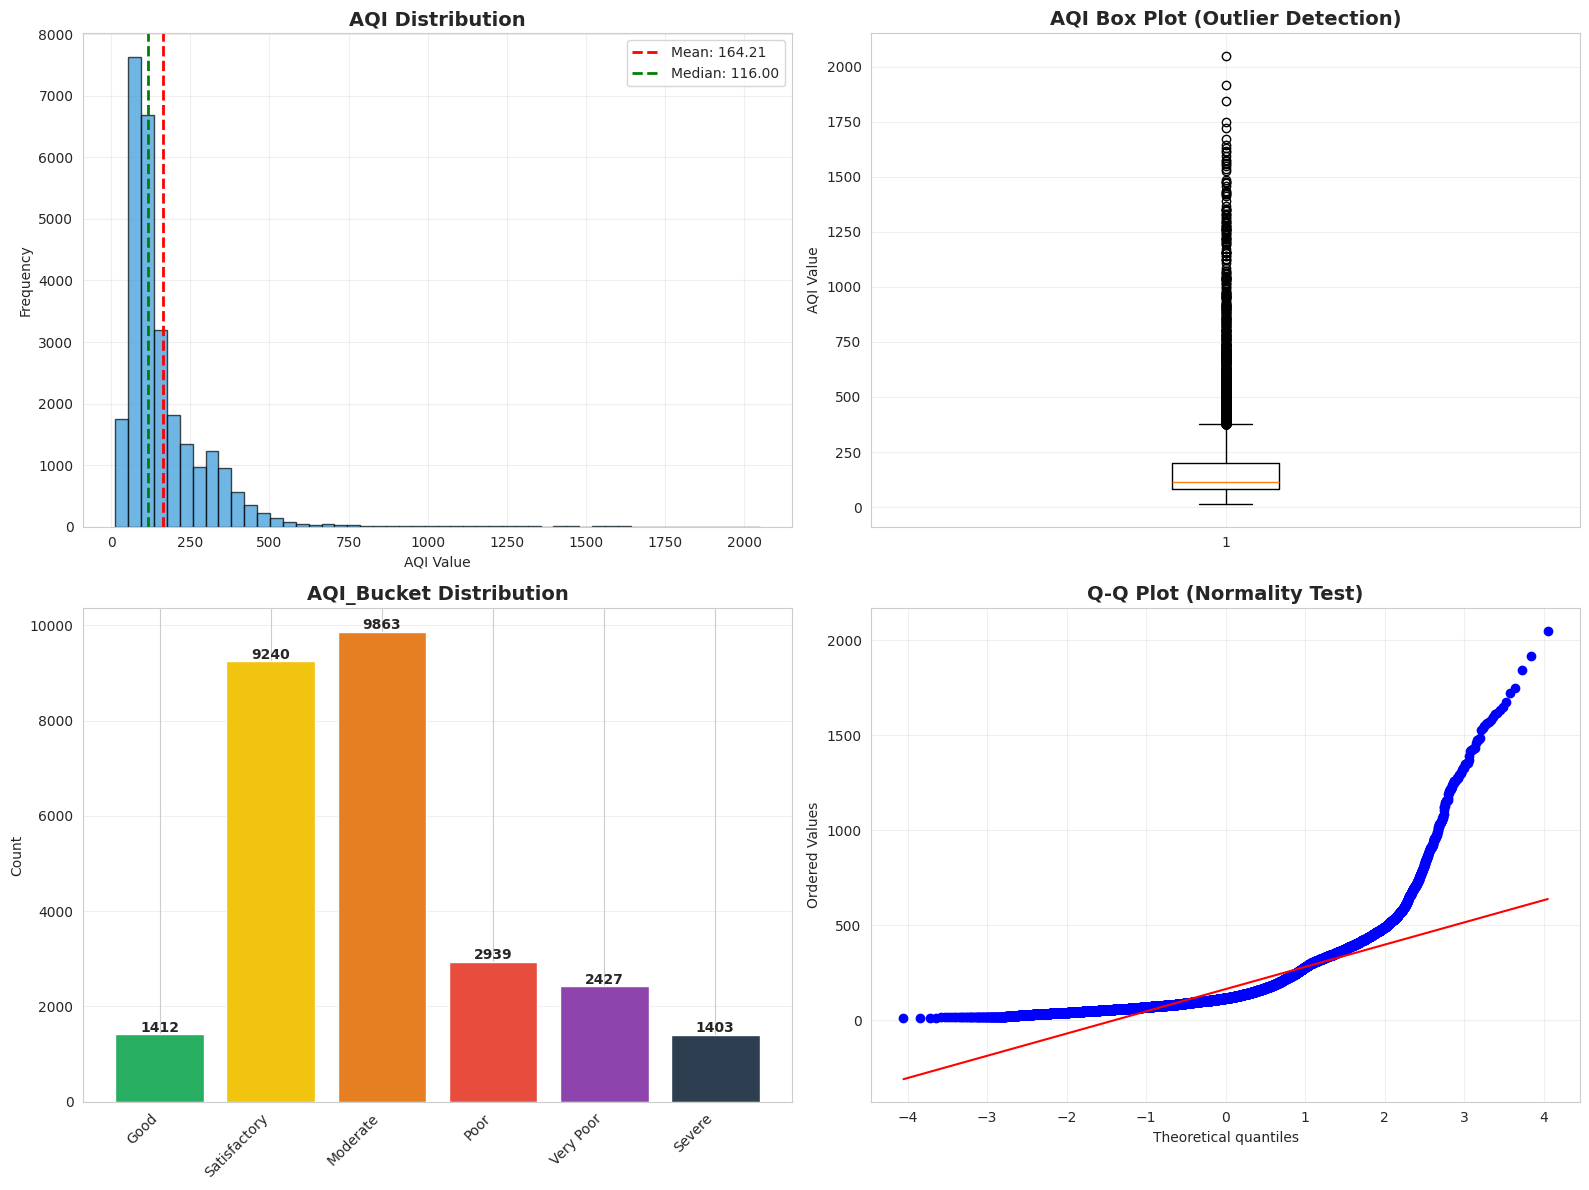

In [44]:

# Check for unrealistic values
unrealistic_aqi = df[df['AQI'] < 0]['AQI'].count()
print(f"\nUnrealistic AQI values (< 0): {unrealistic_aqi}")
extreme_aqi = df[df['AQI'] > 500]['AQI'].count()
print(f"Extreme AQI values (> 500): {extreme_aqi} ({extreme_aqi/len(df)*100:.2f}%)")

# AQI_Bucket Distribution
print("\n AQI_Bucket (Classification Target) Distribution:")
print("-" * 40)
bucket_counts = df['AQI_Bucket'].value_counts()
print(bucket_counts)
print("\nPercentages:")
print((bucket_counts / len(df) * 100).round(2))

# Verify AQI_Bucket consistency with AQI
print("\nVerifying AQI_Bucket consistency with AQI.")

def get_expected_bucket(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df['Expected_Bucket'] = df['AQI'].apply(get_expected_bucket)
mismatches = (df['AQI_Bucket'] != df['Expected_Bucket']).sum()
print(f"Mismatches between AQI and AQI_Bucket: {mismatches}")
if mismatches == 0:
    print("Perfect consistency")
else:
    print("Found inconsistencies - review needed")


# Visualize AQI distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# AQI histogram
axes[0, 0].hist(df['AQI'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['AQI'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["AQI"].mean():.2f}')
axes[0, 0].axvline(df['AQI'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["AQI"].median():.2f}')
axes[0, 0].set_xlabel('AQI Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('AQI Distribution', fontweight='bold', fontsize=14)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# AQI box plot
axes[0, 1].boxplot(df['AQI'], vert=True)
axes[0, 1].set_ylabel('AQI Value')
axes[0, 1].set_title('AQI Box Plot (Outlier Detection)', fontweight='bold', fontsize=14)
axes[0, 1].grid(alpha=0.3)

# AQI_Bucket bar chart
bucket_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
bucket_counts_ordered = df['AQI_Bucket'].value_counts().reindex(bucket_order)
colors = ['#27ae60', '#f1c40f', '#e67e22', '#e74c3c', '#8e44ad', '#2c3e50']
bars = axes[1, 0].bar(range(len(bucket_counts_ordered)), bucket_counts_ordered.values, color=colors)
axes[1, 0].set_xticks(range(len(bucket_counts_ordered)))
axes[1, 0].set_xticklabels(bucket_counts_ordered.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('AQI_Bucket Distribution', fontweight='bold', fontsize=14)
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(bucket_counts_ordered.values):
    axes[1, 0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# QQ plot for normality check
stats.probplot(df['AQI'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Test)', fontweight='bold', fontsize=14)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/01_target_integrity.png', dpi=300, bbox_inches='tight')
print("\n Saved: 01_target_integrity.png")

# UNDERSTAND FEATURE DISTRIBUTIONS (UNIVARIATE EDA)

In [45]:
# Get numeric features (pollutants)
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [col for col in numeric_features if col not in ['AQI', 'Expected_Bucket']]

print(f"\nAnalyzing {len(numeric_features)} pollutant features:")
print(numeric_features)


# Statistical summary
print("\n Distribution Statistics for Each Pollutant:")
print(f"{'Feature':<12} {'Mean':>10} {'Median':>10} {'Std':>10} {'Skew':>8} {'Zeros':>8} {'Outliers':>10}")


Analyzing 12 pollutant features:
['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

 Distribution Statistics for Each Pollutant:
Feature            Mean     Median        Std     Skew    Zeros   Outliers


PM2.5             65.66      47.75      62.43     3.50        0       2084
PM10             116.06     101.22      80.30     2.18        0       1439
NO                17.69      10.22      22.29     3.93        0       2155
NO2               28.13      21.46      24.00     2.53        0       1317
NOx               31.72      22.88      30.56     2.71      528       2193
NH3               24.10      17.15      23.40     4.02       19       1549
CO                 2.30       0.90       7.00     8.80     1565       2508
SO2               14.51       9.43      17.72     4.14        0       2743
O3                34.10      30.06      21.11     1.39        1        856
Benzene            3.22       1.30      14.80    22.75     3268       1615
Toluene            7.85       3.10      18.39    12.37     3641       3053
Xylene             2.69       1.53       6.52    14.18     4756       1624

 Key Observations:
  - Highly skewed features (|skew| > 1): ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', '

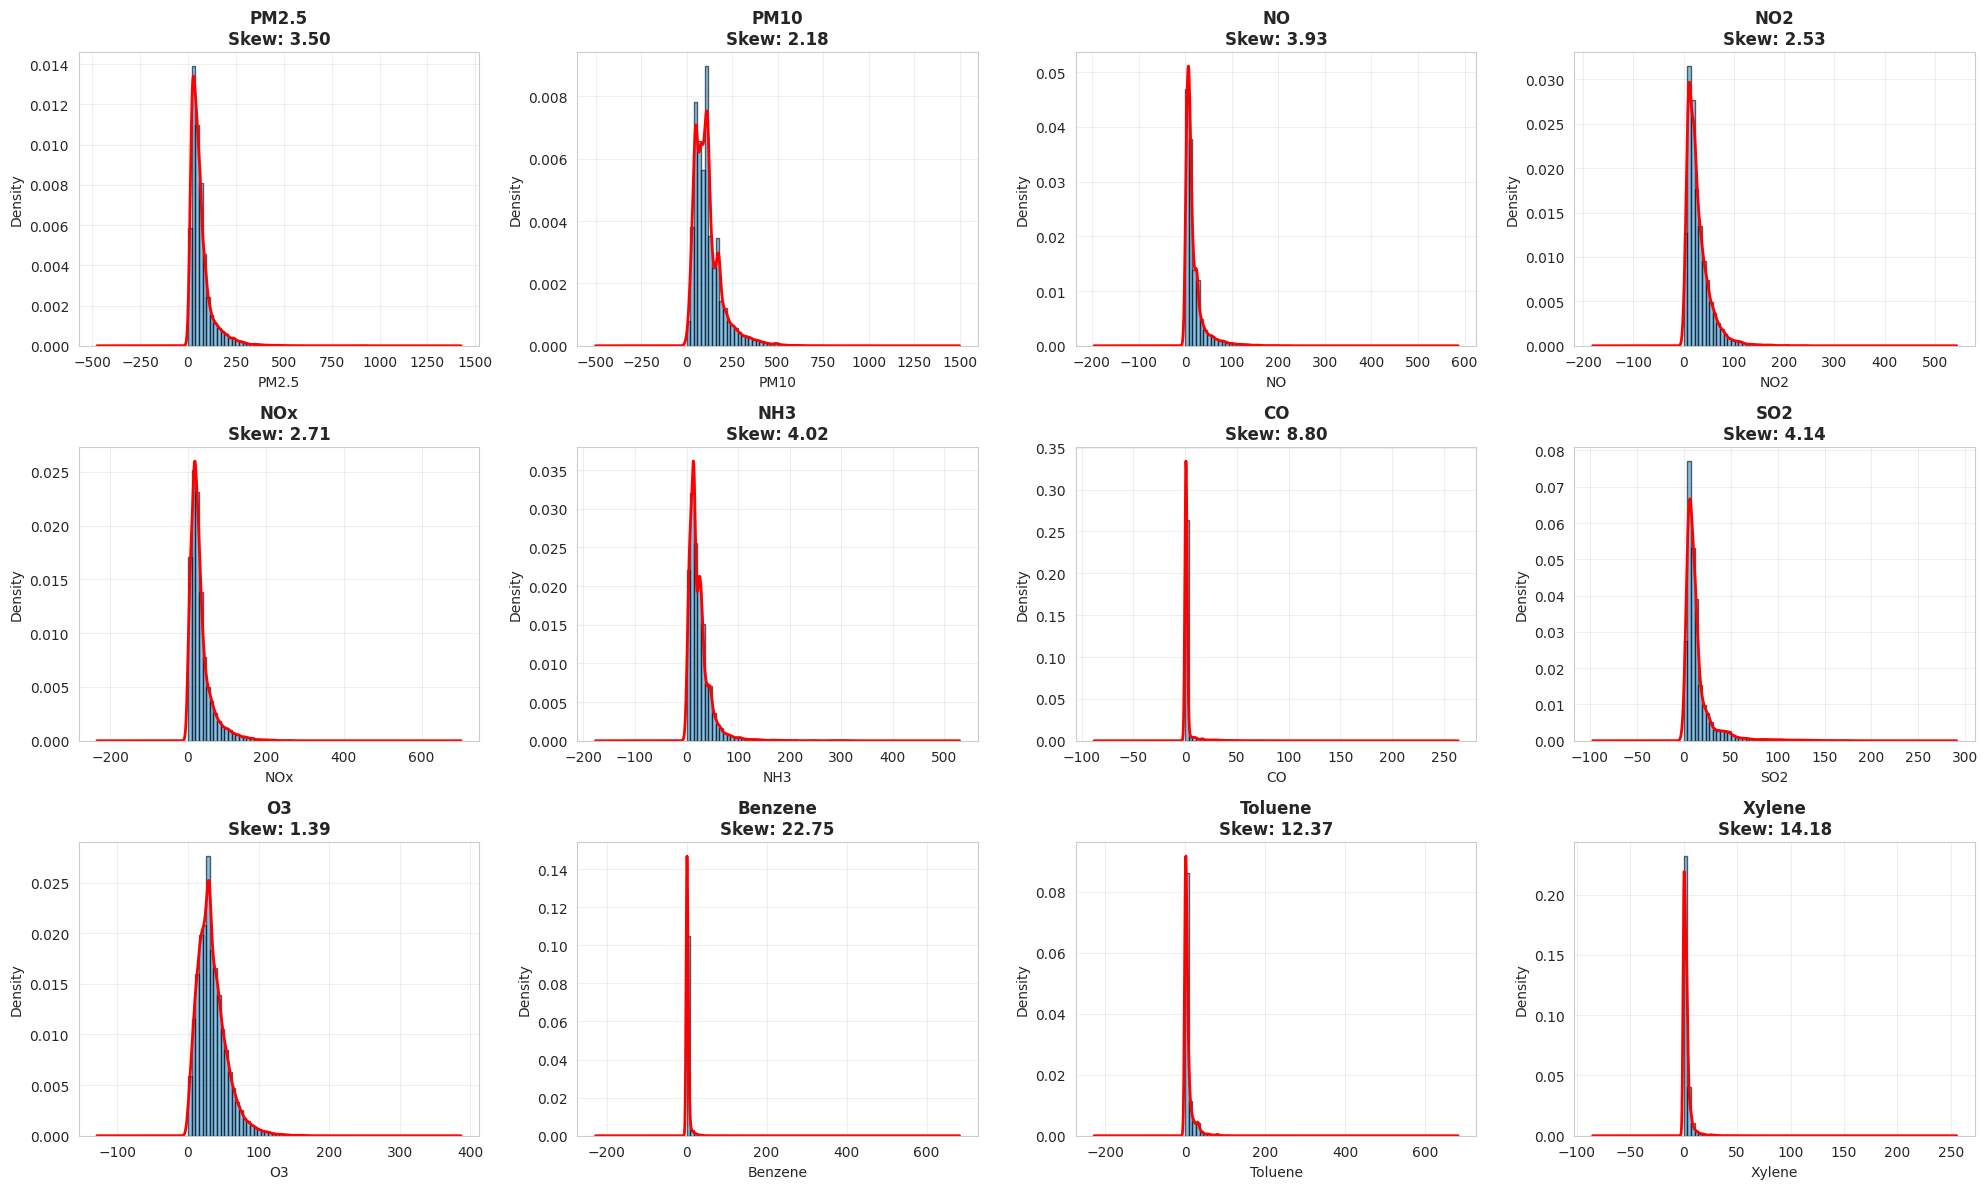

In [46]:
distribution_stats = {}
for feature in numeric_features:
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    std_val = df[feature].std()
    skew_val = skew(df[feature])
    zeros = (df[feature] == 0).sum()
    
    # Outliers using IQR method
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))).sum()
    
    distribution_stats[feature] = {
        'mean': mean_val,
        'median': median_val,
        'std': std_val,
        'skew': skew_val,
        'zeros': zeros,
        'outliers': outliers
    }
    
    print(f"{feature:<12} {mean_val:>10.2f} {median_val:>10.2f} {std_val:>10.2f} {skew_val:>8.2f} {zeros:>8} {outliers:>10}")

print("\n Key Observations:")
highly_skewed = [k for k, v in distribution_stats.items() if abs(v['skew']) > 1]
print(f"  - Highly skewed features (|skew| > 1): {highly_skewed}")
zero_inflated = [k for k, v in distribution_stats.items() if v['zeros'] > len(df) * 0.05]
print(f"  - Zero-inflated features (>5% zeros): {zero_inflated}")
many_outliers = [k for k, v in distribution_stats.items() if v['outliers'] > len(df) * 0.05]
print(f"  - Features with many outliers (>5%): {many_outliers}")

# Visualize distributions
n_features = len(numeric_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    ax = axes[idx]
    
    # Histogram with KDE
    ax.hist(df[feature], bins=50, color='#3498db', alpha=0.6, edgecolor='black', density=True)
    df[feature].plot(kind='kde', ax=ax, color='red', linewidth=2)
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'{feature}\nSkew: {distribution_stats[feature]["skew"]:.2f}', 
                 fontweight='bold')
    ax.grid(alpha=0.3)

# Remove extra subplots
for idx in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('/kaggle/working/02_feature_distributions.png', dpi=300, bbox_inches='tight')
print("\n Saved: 02_feature_distributions.png")

# FEATURE-TARGET RELATIONSHIP (BIVARIATE EDA)


 Correlation with AQI (Regression Target):
CO         0.681527
PM2.5      0.659545
PM10       0.545809
NO2        0.517893
SO2        0.474306
NO         0.422218
NOx        0.420364
NH3        0.322910
Toluene    0.283797
O3         0.195591
Xylene     0.110631
Benzene    0.052953
dtype: float64

 Correlation Categories:
  - Strong correlation (|r| > 0.7): []
  - Moderate correlation (0.4 < |r| ≤ 0.7): ['CO', 'PM2.5', 'PM10', 'NO2', 'SO2', 'NO', 'NOx']
  - Weak correlation (|r| ≤ 0.4): ['NH3', 'Toluene', 'O3', 'Xylene', 'Benzene']

 Saved: 03_feature_target_relationship.png


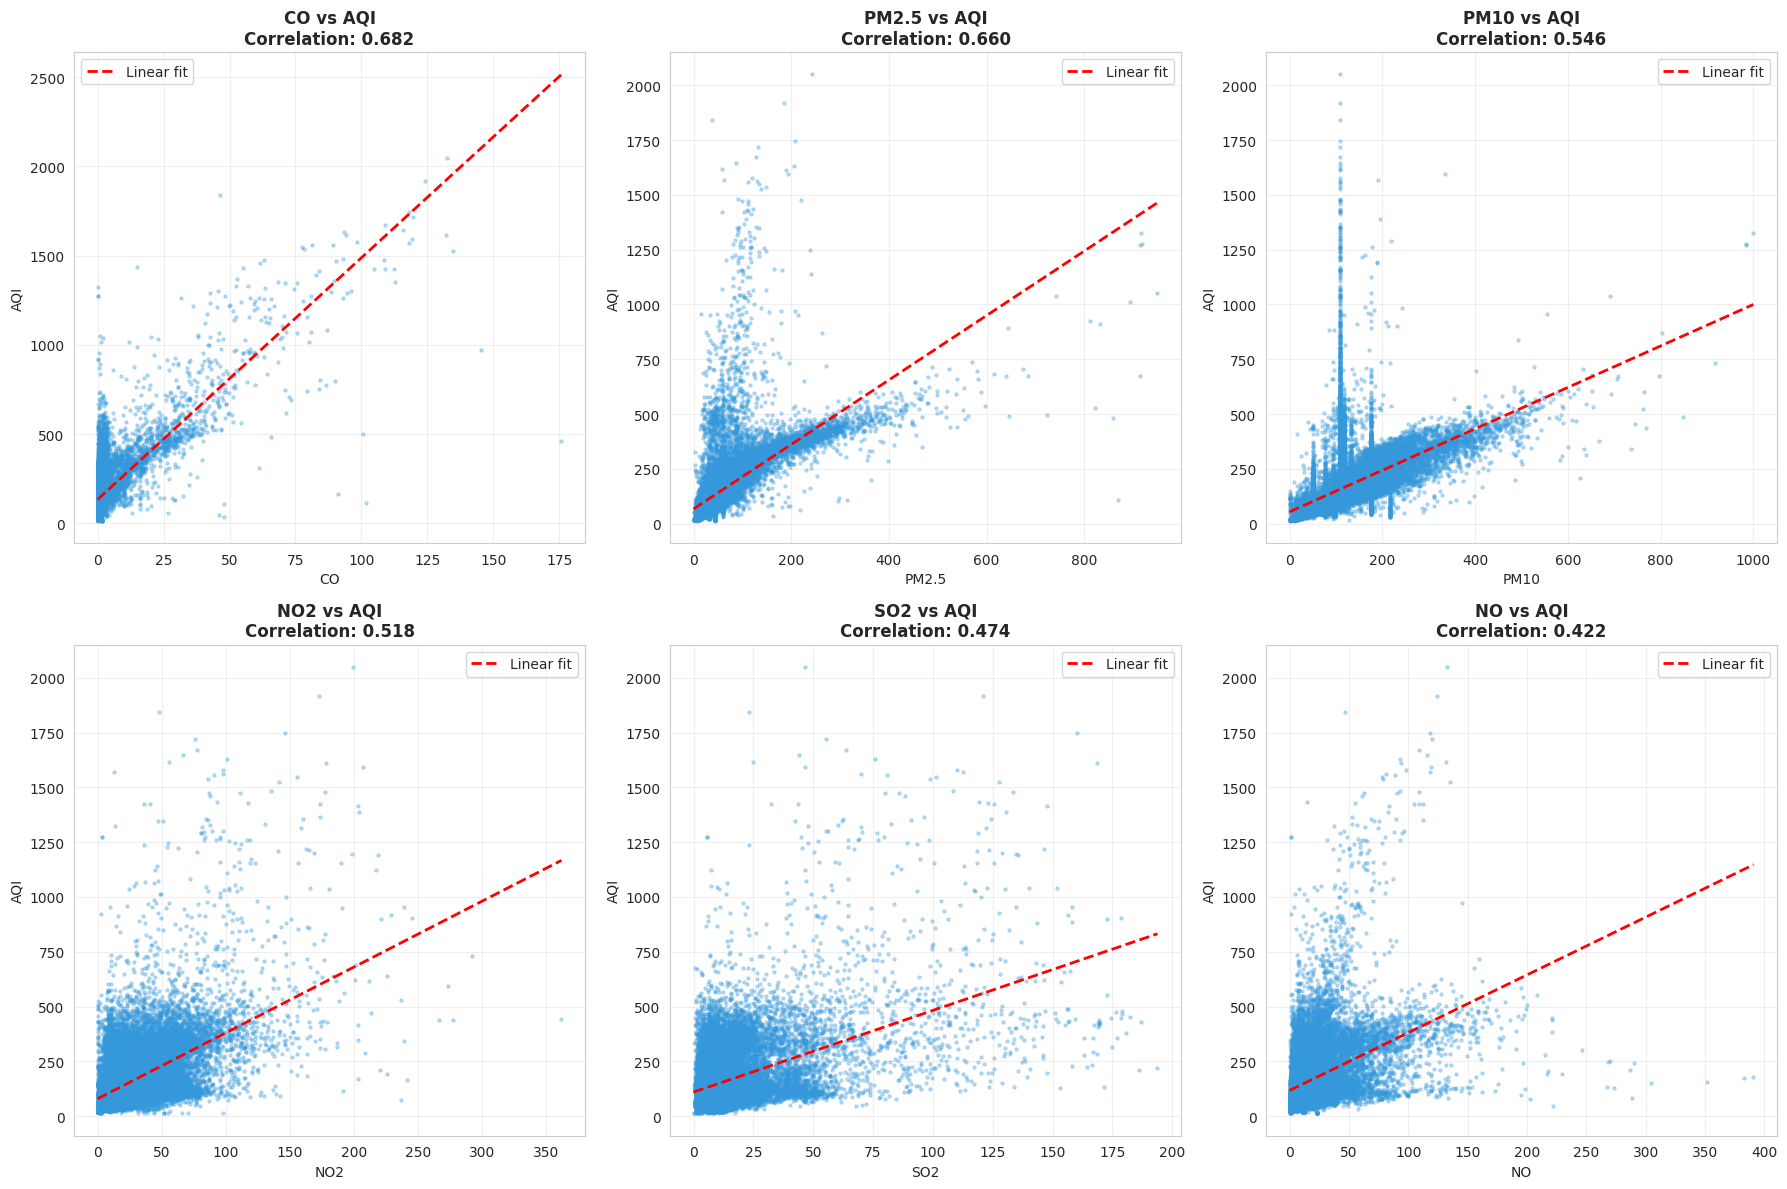

In [47]:
# Calculate correlations with AQI
print("\n Correlation with AQI (Regression Target):")

correlations = df[numeric_features].corrwith(df['AQI']).sort_values(ascending=False)
print(correlations)

# Categorize correlations
strong_corr = correlations[correlations.abs() > 0.7].index.tolist()
moderate_corr = correlations[(correlations.abs() > 0.4) & (correlations.abs() <= 0.7)].index.tolist()
weak_corr = correlations[correlations.abs() <= 0.4].index.tolist()

print("\n Correlation Categories:")
print(f"  - Strong correlation (|r| > 0.7): {strong_corr}")
print(f"  - Moderate correlation (0.4 < |r| ≤ 0.7): {moderate_corr}")
print(f"  - Weak correlation (|r| ≤ 0.4): {weak_corr}")

# Scatter plots for top correlations
top_features = correlations.abs().sort_values(ascending=False).head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    ax = axes[idx]
    
    # Scatter plot with regression line
    ax.scatter(df[feature], df['AQI'], alpha=0.3, s=5, color='#3498db')
    
    # Add regression line
    z = np.polyfit(df[feature], df['AQI'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[feature].min(), df[feature].max(), 100)
    ax.plot(x_line, p(x_line), "r--", linewidth=2, label='Linear fit')
    
    ax.set_xlabel(feature)
    ax.set_ylabel('AQI')
    ax.set_title(f'{feature} vs AQI\nCorrelation: {correlations[feature]:.3f}', 
                 fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/03_feature_target_relationship.png', dpi=300, bbox_inches='tight')
print("\n Saved: 03_feature_target_relationship.png")

# MULTICOLLINEARITY CHECK


 Computing correlation matrix

 Highly Correlated Feature Pairs (|r| > 0.8):
  No highly correlated pairs found

 Expected Multicollinearity Groups:
  - PM2.5 ↔ PM10 (fine vs coarse particulate matter)
  - NO ↔ NO2 ↔ NOx (nitrogen oxides family)
  - Benzene ↔ Toluene ↔ Xylene (aromatic hydrocarbons)

 Saved: 04_correlation_heatmap.png


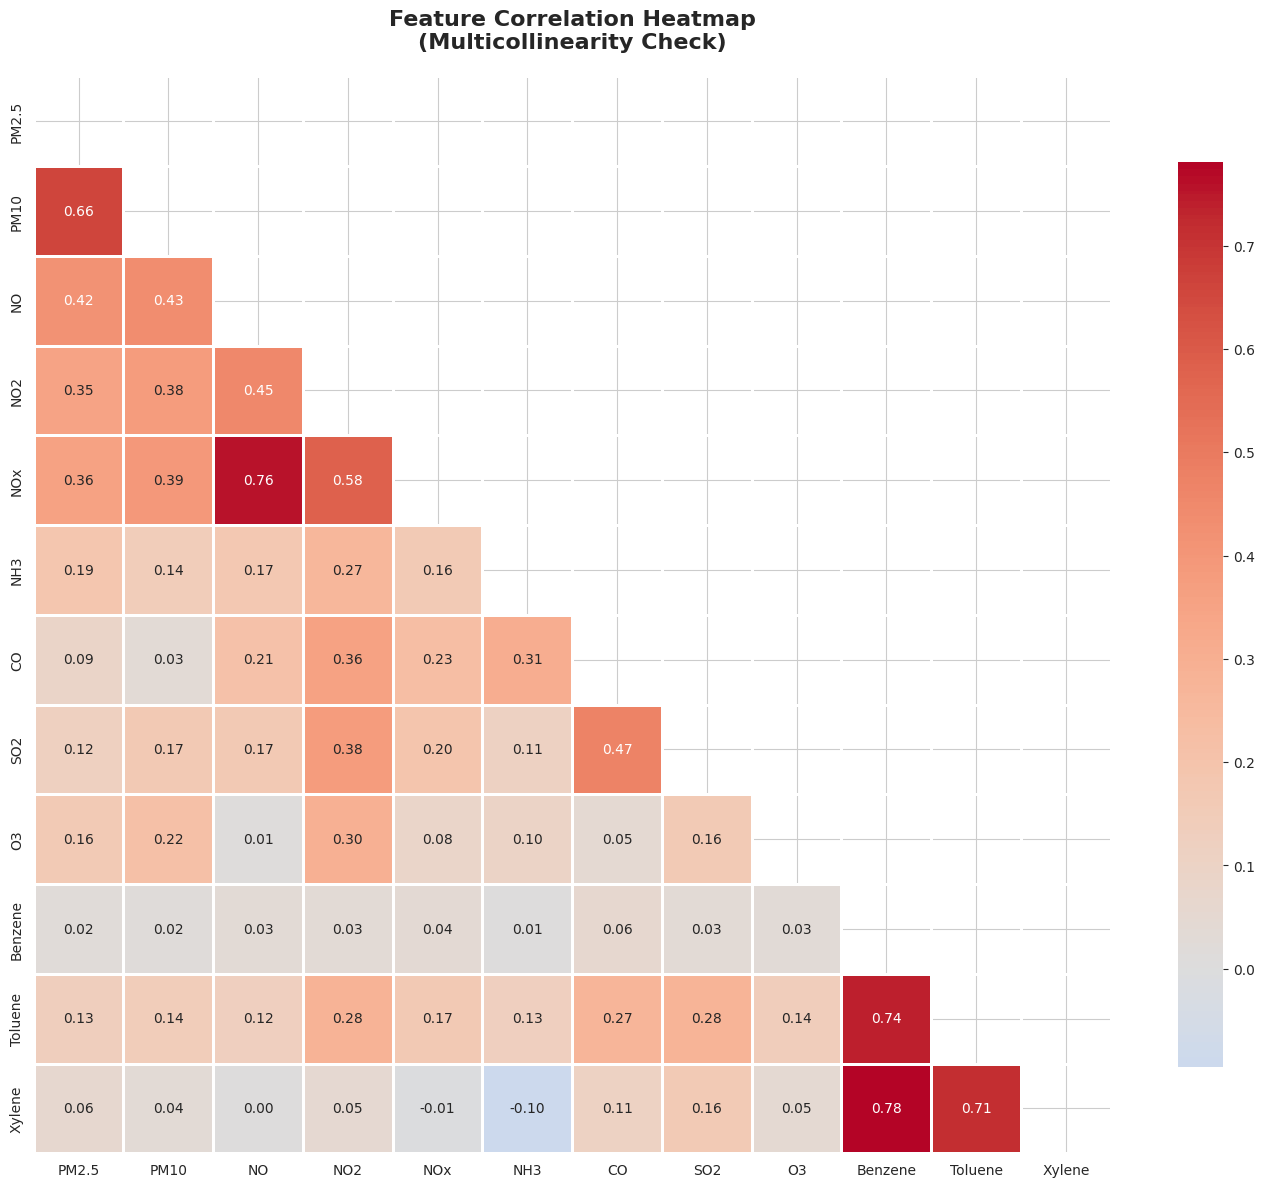

In [48]:
# Correlation matrix
print("\n Computing correlation matrix")
correlation_matrix = df[numeric_features].corr()

# Find highly correlated pairs
print("\n Highly Correlated Feature Pairs (|r| > 0.8):")

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            pair = (correlation_matrix.columns[i], 
                   correlation_matrix.columns[j], 
                   correlation_matrix.iloc[i, j])
            high_corr_pairs.append(pair)
            print(f"  {pair[0]:<12} ↔ {pair[1]:<12} : r = {pair[2]:.3f}")

if len(high_corr_pairs) == 0:
    print("  No highly correlated pairs found")

# Expected correlations
print("\n Expected Multicollinearity Groups:")
print("  - PM2.5 ↔ PM10 (fine vs coarse particulate matter)")
print("  - NO ↔ NO2 ↔ NOx (nitrogen oxides family)")
print("  - Benzene ↔ Toluene ↔ Xylene (aromatic hydrocarbons)")

# Visualize correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap\n(Multicollinearity Check)', 
          fontweight='bold', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('/kaggle/working/04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("\n Saved: 04_correlation_heatmap.png")

# CITY FEATURE ANALYSIS

In [49]:
# City statistics
n_cities = df['City'].nunique()
print(f"\n Number of unique cities: {n_cities}")

# Data per city
city_counts = df['City'].value_counts()
print(f"\nData points per city:")

print(city_counts)

print(f"\nMin samples per city: {city_counts.min()}")
print(f"Max samples per city: {city_counts.max()}")
print(f"Mean samples per city: {city_counts.mean():.0f}")
print(f"Median samples per city: {city_counts.median():.0f}")

# Check for imbalance
imbalance_ratio = city_counts.max() / city_counts.min()
print(f"\nImbalance ratio (max/min): {imbalance_ratio:.2f}")
if imbalance_ratio > 10:
    print(" Significant class imbalance detected")

# AQI distribution per city
print("\n AQI Statistics by City:")

city_aqi_stats = df.groupby('City')['AQI'].agg(['mean', 'median', 'std', 'min', 'max'])
city_aqi_stats = city_aqi_stats.sort_values('mean', ascending=False)
print(city_aqi_stats)



 Number of unique cities: 26

Data points per city:
City
Bengaluru             2009
Delhi                 2007
Lucknow               1991
Hyderabad             1983
Chennai               1975
Patna                 1663
Gurugram              1625
Mumbai                1516
Ahmedabad             1433
Visakhapatnam         1263
Amritsar              1207
Jaipur                1103
Thiruvananthapuram    1098
Jorapokhar             925
Amaravati              905
Kolkata                814
Talcher                812
Brajrajnagar           795
Guwahati               502
Coimbatore             384
Chandigarh             304
Bhopal                 280
Shillong               256
Kochi                  162
Ernakulam              159
Aizawl                 113
Name: count, dtype: int64

Min samples per city: 113
Max samples per city: 2009
Mean samples per city: 1049
Median samples per city: 1012

Imbalance ratio (max/min): 17.78
 Significant class imbalance detected

 AQI Statistics by City:
    

# SCALING & TRANSFORMATION DECISIONS

In [50]:
# Test log transformation on skewed features
print("\n Testing Log Transformation on Highly Skewed Features:")


for feature in highly_skewed[:5]:  # Top 5 skewed features
    original_skew = skew(df[feature])
    log_transformed = np.log1p(df[feature])  # log(1 + x) to handle zeros
    log_skew = skew(log_transformed)
    
    print(f"{feature:<12}: Original skew = {original_skew:>7.2f} → Log skew = {log_skew:>7.2f}")



 Testing Log Transformation on Highly Skewed Features:
PM2.5       : Original skew =    3.50 → Log skew =    0.10
PM10        : Original skew =    2.18 → Log skew =   -0.62
NO          : Original skew =    3.93 → Log skew =    0.23
NO2         : Original skew =    2.53 → Log skew =   -0.39
NOx         : Original skew =    2.71 → Log skew =   -0.77


#  CHECK CLASS BALANCE (AQI_Bucket)


 AQI_Bucket Class Distribution:
  Good           :   1412 ( 5.18%)
  Satisfactory   :   9240 (33.87%)
  Moderate       :   9863 (36.15%)
  Poor           :   2939 (10.77%)
  Very Poor      :   2427 ( 8.90%)
  Severe         :   1403 ( 5.14%)

Imbalance ratio (max/min): 7.03

 Class Balance Assessment:
  Significant imbalance - use class weights or SMOTE

 Saved: 07_class_balance.png


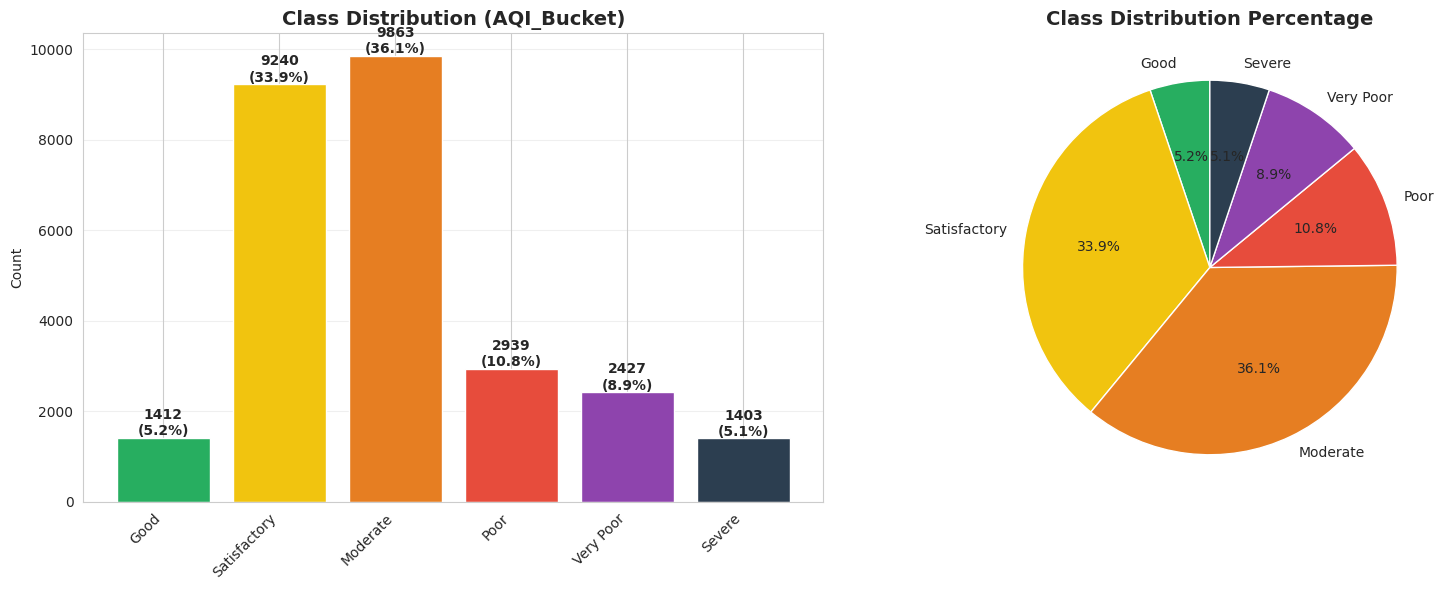

In [51]:
# Class distribution
print("\n AQI_Bucket Class Distribution:")

class_dist = df['AQI_Bucket'].value_counts()
class_pct = (class_dist / len(df) * 100).round(2)

for bucket in bucket_order:
    if bucket in class_dist.index:
        count = class_dist[bucket]
        pct = class_pct[bucket]
        print(f"  {bucket:<15}: {count:>6} ({pct:>5.2f}%)")

# Calculate imbalance ratio
max_class = class_dist.max()
min_class = class_dist.min()
imbalance_ratio = max_class / min_class

print(f"\nImbalance ratio (max/min): {imbalance_ratio:.2f}")

print("\n Class Balance Assessment:")
if imbalance_ratio < 2:
    print("  Well-balanced classes")
elif imbalance_ratio < 5:
    print("  Moderate imbalance - consider class weights")
else:
    print("  Significant imbalance - use class weights or SMOTE")


# Visualize class balance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
ax1 = axes[0]
class_dist_ordered = class_dist.reindex(bucket_order)
bars = ax1.bar(range(len(class_dist_ordered)), class_dist_ordered.values, 
               color=colors[:len(class_dist_ordered)])
ax1.set_xticks(range(len(class_dist_ordered)))
ax1.set_xticklabels(class_dist_ordered.index, rotation=45, ha='right')
ax1.set_ylabel('Count')
ax1.set_title('Class Distribution (AQI_Bucket)', fontweight='bold', fontsize=14)
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(class_dist_ordered.values):
    ax1.text(i, v + 50, f'{v}\n({class_pct.reindex(bucket_order)[i]:.1f}%)', 
             ha='center', fontweight='bold', fontsize=10)

# Pie chart
ax2 = axes[1]
ax2.pie(class_dist_ordered.values, labels=class_dist_ordered.index, autopct='%1.1f%%',
        colors=colors[:len(class_dist_ordered)], startangle=90)
ax2.set_title('Class Distribution Percentage', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.savefig('/kaggle/working/07_class_balance.png', dpi=300, bbox_inches='tight')
print("\n Saved: 07_class_balance.png")